In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print ("Current Dir : " , os.getcwd())
current_dir = os.getcwd()
train_path = os.path.join(current_dir,"dataset","Train")
test_path = os.path.join(current_dir,"dataset","Test")
valid_path = os.path.join(current_dir,"dataset","Valid")

Current Dir :  d:\Prgrms\Vs Code\Potato Plant Disease Prediction Model


In [3]:
#Importing all images in the variable training_set
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical" , 
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear" , 
     )

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode = "categorical" , 
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear" , 
     )

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu' , input_shape = [128,128,3] ))
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides= 2 ))

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu' ))
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides= 2 ))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3 , padding='same' , activation='relu' ))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides= 2 ))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3 , padding='same' , activation='relu' ))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides= 2 ))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3 , padding='same' , activation='relu' ))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides= 2 ))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

C:\Users\kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001) , loss = 'categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs =10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 813ms/step - accuracy: 0.5364 - loss: 0.9652 - val_accuracy: 0.6367 - val_loss: 0.6986
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 804ms/step - accuracy: 0.6912 - loss: 0.6495 - val_accuracy: 0.8533 - val_loss: 0.3450
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 780ms/step - accuracy: 0.8560 - loss: 0.3645 - val_accuracy: 0.8333 - val_loss: 0.4063
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 792ms/step - accuracy: 0.8524 - loss: 0.3053 - val_accuracy: 0.8100 - val_loss: 0.4533
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 826ms/step - accuracy: 0.9183 - loss: 0.2331 - val_accuracy: 0.9433 - val_loss: 0.1356
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 730ms/step - accuracy: 0.9526 - loss: 0.1482 - val_accuracy: 0.9333 - val_loss: 0.2329
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 706ms/step - accuracy: 0.9136 - loss: 0.2291 - val_accuracy: 0.9033 - val_loss: 0.2580
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 702ms/step - accuracy: 0.9349 - loss: 0.2029 - val_accu

In [11]:
train_loss , train_acc = cnn.evaluate(validation_set)
print('Training Accuracy : ' , train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9430 - loss: 0.1625
Training Accuracy :  0.9399999976158142


In [12]:
val_loss , val_acc = cnn.evaluate(validation_set)
print('Validation Accuracy : ' , val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9530 - loss: 0.1313
Validation Accuracy :  0.9399999976158142


In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'accuracy': [0.5833333134651184,
  0.7266666889190674,
  0.8500000238418579,
  0.8600000143051147,
  0.9233333468437195,
  0.9544444680213928,
  0.8955555558204651,
  0.9433333277702332,
  0.8288888931274414,
  0.9166666865348816],
 'loss': [0.8570740222930908,
  0.5932828783988953,
  0.3677936792373657,
  0.3133845627307892,
  0.21537546813488007,
  0.13006886839866638,
  0.2624506652355194,
  0.17283432185649872,
  0.4028254449367523,
  0.1995156705379486],
 'val_accuracy': [0.6366666555404663,
  0.8533333539962769,
  0.8333333134651184,
  0.8100000023841858,
  0.9433333277702332,
  0.9333333373069763,
  0.903333306312561,
  0.8333333134651184,
  0.8133333325386047,
  0.9399999976158142],
 'val_loss': [0.6986437439918518,
  0.3449772000312805,
  0.40626534819602966,
  0.45334771275520325,
  0.13562075793743134,
  0.2329014390707016,
  0.25804242491722107,
  0.5616644620895386,
  0.383699893951416,
  0.14699414372444153]}

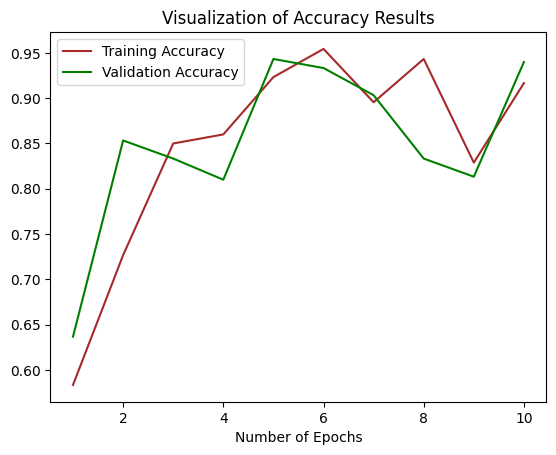

In [15]:
epochs = [ i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.title('Visualization of Accuracy Results')
plt.legend()
plt.show()